In [1]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import glob
import os
import sys
# import brokenaxes

colors = sns.color_palette("colorblind", 8)
plt.rcParams.update({'font.size': 72})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})
plt.rcParams.update({'figure.figsize': '10,8'})
plt.rcParams.update({'lines.linewidth': 4})
plt.rcParams.update({'lines.markersize': 12})
plt.rcParams['axes.titlesize'] = 14



In [2]:
# pd.read_csv('../geosfs_empirical_plots/gnomad_repeatsamps/m')
sumstats = pd.read_csv('../empirical/gnomad_repeatsamps/sumstats.tsv',sep='\t')
freqs_pos = pd.read_csv('../empirical/gnomad_repeatsamps/mean_freqs_high.tsv',sep='\t') 

In [3]:
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


In [4]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]

CPU times: user 800 ms, sys: 26.2 ms, total: 826 ms
Wall time: 841 ms


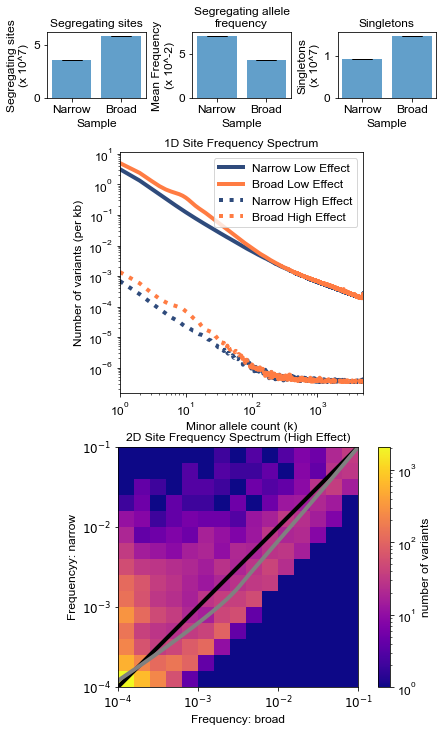

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import statsmodels
import statsmodels.api as sm
from matplotlib.image import NonUniformImage
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, FuncFormatter


colors = [color_palette_original[1],color_palette_original[6]]

# Create 8x10 inch figure
fig = plt.figure(figsize=(6, 10))
gs = gridspec.GridSpec(3, 6, height_ratios=[0.6, 2.2, 2.2])

# Create plots in the first row (3 equal-sized panels)
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.set_title('Segregating Sites')

ax2 = fig.add_subplot(gs[0, 2:4])
ax2.set_title('Mean Allele Frequency')

ax3 = fig.add_subplot(gs[0, 4:6])
ax3.set_title('Singleton Rate')

# Create plots in the second row (middle row will span the entire width)
ax4 = fig.add_subplot(gs[1, 1:5])  # this makes it span the entire width
ax4.set_title('1D Site Frequency Spectrum')

# Create plot in the third row (1 panel)
ax6 = fig.add_subplot(gs[2, 0:6])
ax6.set_title('2D Site Frequency Spectrum (High Effect)')
# Define the layout using gridspec
# gs = gridspec.GridSpec(3, 6, height_ratios=[0.8/6, 2.2/6, 3/6])
# gs = gridspec.GridSpec(3, 2, height_ratios=[0.8/3, 2.2/3, 3/3], width_ratios=[3, 3])


# Create plots in the first row (3 equal sized panels)
# ax1 = fig.add_subplot(gs[0, 0:2])
# ax1.set_title('Segregating Sites')

# ax2 = fig.add_subplot(gs[0, 2:4])
# ax2.set_title('Mean Allele Frequency')
# ax3 = fig.add_subplot(gs[0, 4:6])
# ax3.set_title('Singleton Rate')

# Create plots in the second row (2 equal width panels)
# ax4 = fig.add_subplot(gs[1,:])
# ax4.set_title('1D Site Frequency Spectrum')
# ax5 = fig.add_subplot(gs[1, 3:6])
# ax5.set_title('High Effect Variants')

# Create plot in the third row (1 panel)
# ax6 = fig.add_subplot(gs[2, :])
# ax6.set_title('2D Site Frequency Spectrum (High Effect Variants)')

samps = ['Narrow','Broad']

# plot seg sites
means = [np.mean(data)/1e7 for data in [sumstats['segsites_nfe'],sumstats['segsites_eur']]]
errors = [np.std(data,ddof=1)/1e7 for data in [sumstats['segsites_nfe'],sumstats['segsites_eur']]]

ax1.bar(samps,means,yerr=errors,alpha=0.7,capsize=10,error_kw={'linewidth':12})
ax1.set_xlabel("Sample")
ax1.set_ylabel("Segregating sites\n(x 10^7)")
ax1.set_title("Segregating sites")
# ax1.set_yscale('log')

# ytick_locations = [0.1e6,8e7]
# ytick_labels = ['0x10^7', '8x10^7']
# ytick_labels = ['0x10^7', '0.2x10^6', '0.5x10^6', '1x10^6', '2x10^6', '5x10^6', '10x10^6', '20x10^6']


# ytick_locations = [0.1e6, 0.2e6, 0.5e6, 1e6, 2e6, 5e6, 10e6, 20e6]
# ytick_labels = ['0x10^6', '0.2x10^6', '0.5x10^6', '1x10^6', '2x10^6', '5x10^6', '10x10^6', '20x10^6']

# Apply the custom y-tick locations and labels to ax1
# ax1.set_yticks(ytick_locations)
# ax1.set_yticklabels(ytick_labels)


# num_yticks = 9  # Adjust as needed
# min_exponent = 1
# max_exponent = 9

# # Generate even y-tick locations, excluding 0
# yticks = [10**exponent for exponent in range(min_exponent, max_exponent + 1)]

# # Add 0x10^6 as the first y-tick
# yticks = [0] + yticks

# # Apply the custom y-tick locations to ax1
# ax1.set_yticks(yticks)

# # Format y-tick labels as "0x10^6", "1x10^6", "2x10^6", ...
# def custom_formatter(x, pos):
#     if x == 0:
#         return "0x10^6"
#     exponent = int(round(6 + 6 * (x > 1)))
#     return f"{int(x/1e6)}x10^{exponent}"

# # Apply the custom y-tick formatter to the y-axis of ax1
# ax1.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
# ax1.tick_params(axis='y', pad=15)  # Increase label spacing
# ax1.yaxis.set_tick_params(width=1)  # Adjust label alignment

# Generate even y-tick locations
# yticks = np.logspace(min_exponent, max_exponent, num=num_yticks, base=10)
# ax1.set_ylim(1e5,1e7)
# Apply the custom y-tick locations
# plt.yticks(yticks)
# ax1.set_ylim(1e0,1e9)#6.5e7)
# yticks = [1e7,2e7,3e7,4e7,5e7,6e7,7e7,8e7,9e7,1e8]
# yticks = [1e6,1e8]
# ax1.set_yticks(yticks)
# ax1.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=yticks))
# ax1.set_xticklabels(samps)

# plot mean AF
means = [np.mean(data)/1e-2 for data in [sumstats['af_nfe'],sumstats['af_eur']]]
errors = [np.std(data,ddof=1)/1e-2 for data in [sumstats['af_nfe'],sumstats['af_eur']]]

ax2.bar(samps,means,yerr=errors,alpha=0.7,capsize=10,error_kw={'linewidth':12})
ax2.set_xlabel("Sample")
ax2.set_ylabel("Mean Frequency\n(x 10^-2)")
ax2.set_title("Segregating allele\nfrequency")
# ax2.set_yscale('log')
# ax2.set_ylim(1e-2,1e-1)#7.5e-2)
# yticks = [1e-2,1e-1]
# ax2.set_yticks(yticks)

means = [np.mean(data)/1e7 for data in [sumstats['singletons_nfe'],sumstats['singletons_eur']]]
errors = [np.std(data,ddof=1)/1e7 for data in [sumstats['singletons_nfe'],sumstats['singletons_eur']]]

ax3.bar(samps,means,yerr=errors,alpha=0.7,capsize=10,error_kw={'linewidth':12})# sns.boxplot(data=selected_columns,ax=ax2)

ax3.set_xlabel("Sample")
ax3.set_ylabel("Singletons\n(x 10^7)")
ax3.set_title("Singletons")
# ax3.set_yscale('log')
# ax3.set_ylim(1e0,1e9)
# yticks = [1e6,1e8]
# ax3.set_yticks(yticks)
# SFS plots

filenames = glob.glob('../empirical/gnomad_repeatsamps/sfs_counts/*')
nfe_neutral = []
eur_neutral = []
nfe_high = []
eur_high = []
for file in filenames:
    df = pd.read_csv(file,sep='\t')
    nfe_neutral.append(df['ac_nfe_counts_neutral'])
    eur_neutral.append(df['ac_eur_counts_neutral'])
    nfe_high.append(df['ac_nfe_counts_high'])
    eur_high.append(df['ac_eur_counts_high'])
    
xmax=5000
n=10000
numbp=2897694168
avg_nfe_neutral = np.mean(nfe_neutral,axis=0).tolist()
avg_eur_neutral = np.mean(eur_neutral,axis=0).tolist()
avg_nfe_high = np.mean(nfe_high,axis=0).tolist()
avg_eur_high = np.mean(eur_high,axis=0).tolist()
ax4.loglog(np.array(df['ac_nfe_neutral'][1:xmax]),(np.array(avg_nfe_neutral[1:xmax])/numbp)*1e3,label=samps[0]+" Low Effect",color=colors[0])    
ax4.loglog(np.array(df['ac_eur_neutral'][1:xmax]),(np.array(avg_eur_neutral[1:xmax])/numbp)*1e3,label=samps[1]+" Low Effect",color=colors[1])
ax4.loglog(np.array(df['ac_nfe_high'][1:xmax]),(np.array(avg_nfe_high[1:xmax])/numbp)*1e3,label=samps[0]+" High Effect",linestyle='dotted',color=colors[0])    
ax4.loglog(np.array(df['ac_eur_high'][1:xmax]),(np.array(avg_eur_high[1:xmax])/numbp)*1e3,label=samps[1]+" High Effect",linestyle='dotted',color=colors[1])
ax4.set_xlim(1,5e3)

ax4.legend()
ax4.set_ylabel("Number of variants (per kb)")
ax4.set_xlabel("Minor allele count (k)")
# ax4.set_xlim(1,xmax)

# ax5.loglog(np.array(df['ac_nfe_high'][1:xmax]),(np.array(avg_nfe_high[1:xmax])/numbp)*1e3,label=samps[0])    
# ax5.loglog(np.array(df['ac_eur_high'][1:xmax]),(np.array(avg_eur_high[1:xmax])/numbp)*1e3,label=samps[1])
# ax5.legend()
# ax5.set_ylabel("Number of variants (per kb)")
# ax5.set_xlabel("Minor allele count (k)")
# ax5.set_xlim(1,xmax)

# biplot

# Limits
lower_limit = 1e-4
upper_limit = 0.1

# Filter data based on the limits
filtered_freqs_pos = freqs_pos[
    (freqs_pos['average_nfe'] >= lower_limit) & (freqs_pos['average_nfe'] <= upper_limit) & 
    (freqs_pos['average_eur'] >= lower_limit) & (freqs_pos['average_eur'] <= upper_limit) 

]
# line below fixes bug
filtered_freqs_pos = filtered_freqs_pos.groupby(['CHROM','POS']).mean().reset_index()

yvals = [np.log10(y) for y in filtered_freqs_pos['average_nfe']]
xvals = [np.log10(x) for x in filtered_freqs_pos['average_eur']]

hist, xedges, yedges = np.histogram2d(y=yvals,x=xvals,bins=(15,15))
# ax6.imshow(hist,interpolation='nearest',origin='lower',extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]],
#           aspect = 'auto',cmap='Blues',norm=LogNorm())

hist[hist == 0] = 0.99  # Use a value slightly less than your vmin (1) to ensure it gets the darkest color

norm = LogNorm(vmin=1)
cmap = plt.get_cmap('plasma')
cmap.set_under(cmap(0))

c = ax6.pcolormesh(xedges, yedges, hist, cmap=cmap, norm=norm)

# Add a colorbar
plt.colorbar(c, ax=ax6,label="number of variants")


# Set the extent of the image
ax6.set_xlim(xedges[0], xedges[-1])
ax6.set_ylim(yedges[0], yedges[-1])

ax6.set_aspect('equal')

ax6.set_ylabel('Frequencyy: narrow')
ax6.set_xlabel('Frequency: broad')

min_val = min(ax6.get_xlim()[0], ax6.get_ylim()[0])
max_val = max(ax6.get_xlim()[1], ax6.get_ylim()[1])
ax6.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')

xticks = [-4,-3,-2,-1]
yticks = [-4,-3,-2,-1]

%time lowess = sm.nonparametric.lowess(yvals,xvals,frac=1)
ax6.plot(lowess[:,0], lowess[:,1], color='gray')
xticklabels = [f"$10^{{{int(val)}}}$" for val in xticks]
yticklabels = [f"$10^{{{int(val)}}}$" for val in yticks]
ax6.set_xticks(xticks)
ax6.set_yticks(yticks)
ax6.set_xticklabels(xticklabels,fontsize=12)
ax6.set_yticklabels(yticklabels,fontsize=12)

# Display the figure
plt.tight_layout(pad=0.1)
# plt.show()
plt.savefig("gnomad.pdf")


In [6]:
sumstats

,segsites_nfe,af_nfe,singletons_nfe,segsites_eur,af_eur,singletons_eur,af_var_nfe,af_var_eur
0,35428414,0.070292,9350932,58644881,0.042692,14803483,0.033752,0.021006
1,35427200,0.070295,9348143,58637659,0.042698,14800431,0.033753,0.021009
2,35432324,0.070286,9354564,58640240,0.042695,14799651,0.033749,0.021008
3,35421137,0.070309,9344729,58619432,0.042710,14786510,0.033759,0.021015
4,35426513,0.070297,9350006,58627592,0.042704,14791910,0.033754,0.021012
5,35426465,0.070298,9350427,58629624,0.042703,14794463,0.033754,0.021011
6,35426634,0.070296,9353297,58624689,0.042706,14787377,0.033754,0.021013
7,35433465,0.070283,9358447,58637306,0.042697,14794831,0.033748,0.021009
8,35432893,0.070285,9355191,58632251,0.042702,14790167,0.033749,0.021011
9,35430122,0.070289,9350228,58631058,0.042702,14792395,0.033751,0.021011
